In [ ]:
import numpy as np 
#aqui estoy importando la libreria de numpy
import pandas as pd
#aqui estoy importando la libreria de pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.DataFrame(np.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#creo la variable df para poder verla luego, esta variale incluye lo siguiente
#llama un Dataframe con panda, con los datos del proyecto_training_data que se carga con numpy, adentro del dataframe coloco una coma y pongo columns 
#para darle nombre a las columnas 
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [ ]:
filas , columnas = df.shape
print(filas) #tomar en cuenta el index empieza en 0 por eso marca 1459, en vez de 1460
print(columnas)

1460
6


In [ ]:
#usare shuffle para poder colocar los datos de forma aleatoria
np.random.shuffle(df.values)
#voy a separar los datos en 80% de entrenamiento y el 20% de validacion
Cantidad_filas_Entrenamiento =int(0.8*len(df))
#necesito hacer dos subconjuntos, usare iloc
set_Entrenamiento = df.iloc[:Cantidad_filas_Entrenamiento]
set_validacion = df.iloc[Cantidad_filas_Entrenamiento:]

print(set_Entrenamiento)
print('--------')
print(set_validacion)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0       85400.0          6.0     483.0           4.0     1971.0         21.0
1      426000.0         10.0    1742.0           9.0     2007.0         96.0
2      167900.0          6.0     798.0           7.0     1964.0         80.0
3      183900.0          7.0     713.0           6.0     1999.0         35.0
4      173000.0          6.0    1167.0           6.0     1992.0          NaN
...         ...          ...       ...           ...        ...          ...
1163   181000.0          7.0    1504.0           7.0     2005.0         43.0
1164   222000.0          7.0     993.0           8.0     1997.0          NaN
1165   232600.0          8.0    1489.0           7.0     2006.0         81.0
1166   124000.0          5.0    1584.0           8.0     1967.0         65.0
1167   281213.0          8.0    1133.0           9.0     2005.0         88.0

[1168 rows x 6 columns]
--------
      SalePrice  OverallQual  1stFlrSF  To

In [ ]:
def getDFDataTypes(df):
    continuas = []
    discretas  = []
    categoricas = [] 
    for col in df.columns.values:
        if((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
            cantidad = len(df[col].value_counts())
            if(cantidad >= 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas
continuas, discretas, categoricas = getDFDataTypes(df)
print('continuas:',continuas)
print('discretas:',discretas)
print('categoricas:',categoricas)

continuas: ['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']
discretas: ['OverallQual', 'TotRmsAbvGrd']
categoricas: []


### Analisis Exploratorio de datos para cada variable.

In [ ]:
#sacando datos para la primera variable, 
col1 = set_Entrenamiento.to_numpy()[:,0]
Sale_Price_media = np.round((np.mean(col1)),2)
Sale_Price_Max = np.max(col1)
Sale_Price_Min = np.min(col1)
Sale_Price_Rango = np.ptp(col1)
Sale_Price_Desves = np.round((np.std(col1)),2)
Exploracion_Precio = [Sale_Price_media,Sale_Price_Max,Sale_Price_Min,Sale_Price_Rango,Sale_Price_Desves]
Exploracion_Precio

[179667.45, 755000.0, 34900.0, 720100.0, 80108.66]

In [ ]:
#Exploracion segunda variable, 
col2 = set_Entrenamiento.to_numpy()[:,1]
Overall_media = np.round((np.mean(col2)),2)
Overall_Max = np.max(col2)
Overall_Min = np.min(col2)
Overall_Rango = np.ptp(col2)
Overall_Desves = np.round((np.std(col2)),2)
Exploracion_Overall = [Overall_media,Overall_Max,Overall_Min,Overall_Rango,Overall_Desves]



In [ ]:
#Exploracion tercera variable, 
col3 = set_Entrenamiento.to_numpy()[:,2]
firstfloor_media = np.round((np.mean(col3)),2)
firstfloor_Max = np.max(col3)
firstfloor_Min = np.min(col3)
firstfloor_Rango = np.ptp(col3)
firstfloor_Desves = np.round((np.std(col3)),2)
Exploracion_firstfloor = [firstfloor_media,firstfloor_Max,firstfloor_Min,firstfloor_Rango,firstfloor_Desves]

In [ ]:
#Exploracion cuarta variable, 
col4 = set_Entrenamiento.to_numpy()[:,3]
Rooms_media = np.round((np.mean(col4)),2)
Rooms_Max = np.max(col4)
Rooms_Min = np.min(col4)
Rooms_Rango = np.ptp(col4)
Rooms_Desves = np.round((np.std(col4)),2)
Exploracion_Rooms = [Rooms_media,Rooms_Max,Rooms_Min,Rooms_Rango,Rooms_Desves]

In [ ]:
#Exploracion quinta variable, 
col5 = set_Entrenamiento.to_numpy()[:,4]
Year_media = np.round((np.mean(col5)),2)
Year_Max = np.max(col5)
Year_Min = np.min(col5)
Year_Rango = np.ptp(col5)
Year_Desves = np.round((np.std(col5)),2)
Exploracion_Year = [Year_media,Year_Max,Year_Min,Year_Rango,Year_Desves]

In [ ]:
#Exploracion sexta variable, 
col6 = set_Entrenamiento.to_numpy()[:,5]
Frontage_media = np.round((np.nanmean(col6)),2)
Frontage_Max = np.nanmax(col6)
Frontage_Min = np.nanmin(col6)
Frontage_Rango = Frontage_Max-Frontage_Min #realice la resta ya que ptp no acepta datos nan
Frontage_Desves = np.round((np.nanstd(col6)),2)
Frontage_Overall = [Frontage_media,Frontage_Max,Frontage_Min,Frontage_Rango,Frontage_Desves]

In [ ]:
#haciendo una tabla con los datos
Dato_Estadistico = ['Sales Price','Overall Quall','First Floor','Rooms','Year Build','Frontage']
Media = [Sale_Price_media,Overall_media,firstfloor_media,Rooms_media,Year_media,Frontage_media]
Maximo = [Sale_Price_Max,Overall_Max,firstfloor_Max,Rooms_Max,Year_Max,Frontage_Max]
Minimo = [Sale_Price_Min,Overall_Min,firstfloor_Min,Rooms_Min,Year_Min,Frontage_Min]
Rango = [Sale_Price_Rango,Overall_Rango,firstfloor_Rango,Rooms_Rango,Year_Rango,Frontage_Rango]
Desviacion = [Sale_Price_Desves,Overall_Desves,firstfloor_Desves,Rooms_Desves,Year_Desves,Frontage_Desves]


In [ ]:
Tabla_Exploracion = { 'Datos': Dato_Estadistico,
         'Medias': pd.Series( Media),
         'Maximos': pd.Series(Maximo),
         'Minimos':pd.Series(Minimo),
         'Rango':pd.Series(Rango),
         'Desviacion Estandar':pd.Series(Desviacion),
     }
df1 = pd.DataFrame(Tabla_Exploracion)
df1

,Datos,Medias,Maximos,Minimos,Rango,Desviacion Estandar
0,Sales Price,179667.45,755000.0,34900.0,720100.0,80108.66
1,Overall Quall,6.08,10.0,1.0,9.0,1.39
2,First Floor,1157.35,4692.0,372.0,4320.0,392.04
3,Rooms,6.50,14.0,3.0,11.0,1.64
4,Year Build,1970.83,2010.0,1872.0,138.0,30.22
5,Frontage,69.60,313.0,21.0,292.0,24.72


### 4. Histograma  para cada variable  del Dataset

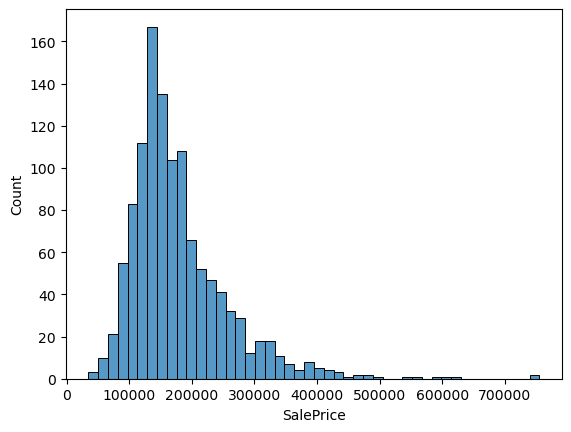

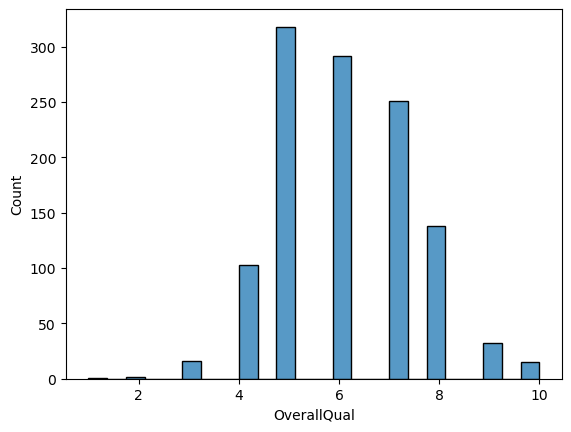

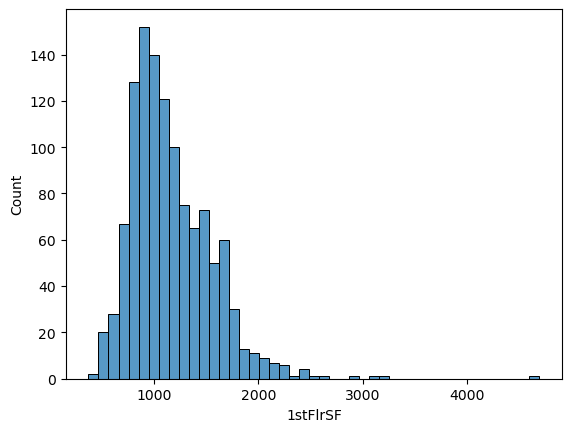

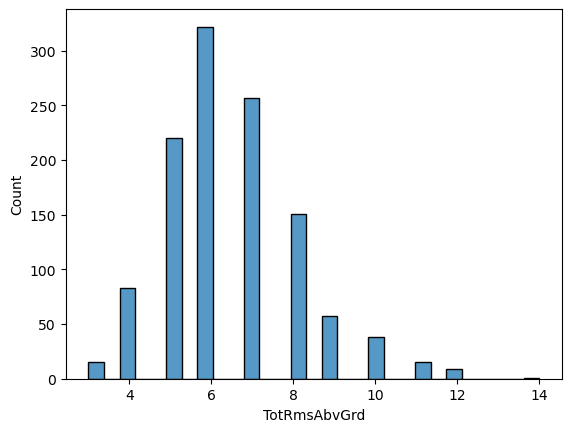

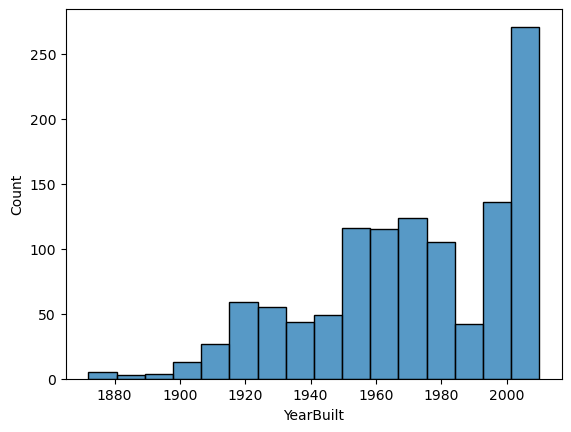

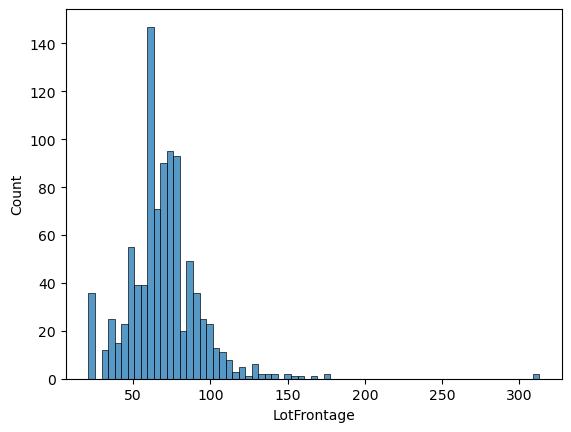

In [ ]:
for variables in set_Entrenamiento.columns:
    sns.histplot(set_Entrenamiento[variables].dropna())
    #use Histplot ya que el programa me mostraba un mensaje que distplot dejaria de utilizarse
    #por lo cual pedia cambiar a histplot o displot 
    plt.show()


### 5. Para cada variable independiente X calcular"

#### Coeficiente de correlacion entre x y y 

In [ ]:
#Coeficiente de correlacion con primera variable 
print(set_Entrenamiento.columns)
correlacion1 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["OverallQual"])
correlacion2 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["1stFlrSF"])
correlacion3 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["TotRmsAbvGrd"])
correlacion4 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["YearBuilt"])
correlacion5 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["LotFrontage"])

Tabla_Correlaciones = { 'Variable': ("OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"),
         'Correlacion': (correlacion1,correlacion2,correlacion3,correlacion4,correlacion5),
     }
df2 = pd.DataFrame(Tabla_Correlaciones)
df2


Index(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt',
       'LotFrontage'],
      dtype='object')


,Variable,Correlacion
0,OverallQual,0.783242
1,1stFlrSF,0.603912
2,TotRmsAbvGrd,0.540299
3,YearBuilt,0.508465
4,LotFrontage,0.360703


#### Graficos para cada relacion

Text(0.5, 1.0, '0.7832424258606967')

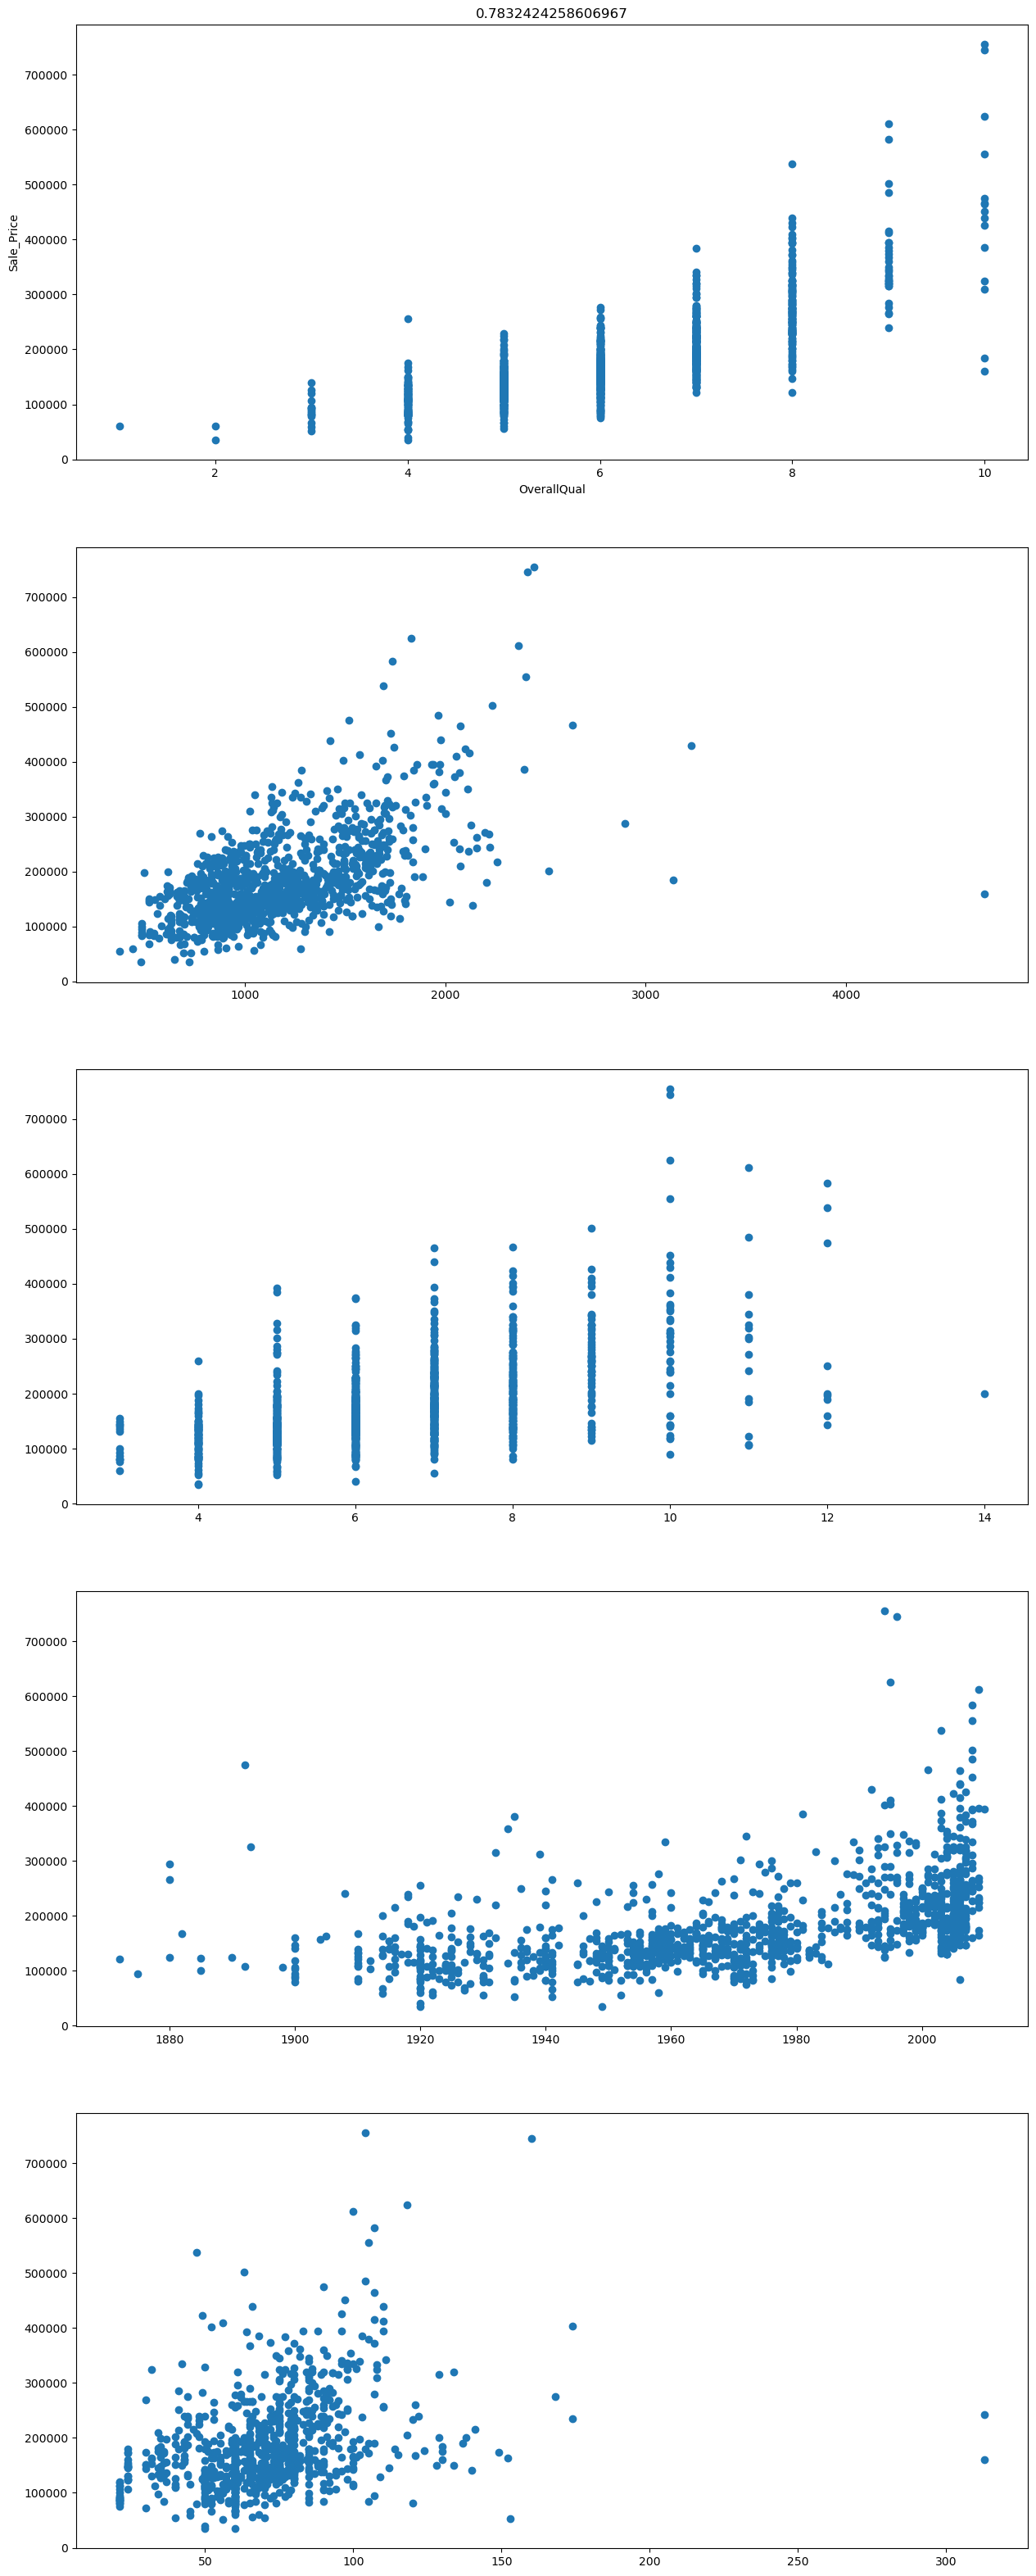

In [ ]:
#al intentar hacerlo en una grafica se superponen los datos por lo cual 
#voy a usar subplots 

fig, sca =plt.subplots(5,1, figsize =(15,40))
sca[0].scatter(set_Entrenamiento["OverallQual"],set_Entrenamiento["SalePrice"])
sca[1].scatter(set_Entrenamiento["1stFlrSF"],set_Entrenamiento["SalePrice"])
sca[2].scatter(set_Entrenamiento["TotRmsAbvGrd"],set_Entrenamiento["SalePrice"])
sca[3].scatter(set_Entrenamiento["YearBuilt"],set_Entrenamiento["SalePrice"])
sca[4].scatter(set_Entrenamiento["LotFrontage"],set_Entrenamiento["SalePrice"])
#PARA PODER COLOCAR TITULO Y EJES:
sca[0].set_xlabel('OverallQual')
sca[0].set_ylabel('Sale_Price')
sca[0].set_title('Grafico Sale_Price vs Overallqual con una Correlacion de:',correlacion1)

sca[1].set_xlabel('1stFlrSF')
sca[1].set_ylabel('Sale_Price')
sca[1].set_title('Grafico Sale_Price vs 1stFlrSF con una Correlacion de:',correlacion2)

sca[2].set_xlabel('TotRmsAbvGrd')
sca[2].set_ylabel('Sale_Price')
sca[2].set_title('Grafico Sale_Price vs TotRmsAbvGrd con una Correlacion de:',correlacion3)

sca[3].set_xlabel('YearBuilt')
sca[3].set_ylabel('Sale_Price')
sca[3].set_title('Grafico Sale_Price vs YearBuilt con una Correlacion de:',correlacion4)

sca[4].set_xlabel('LotFrontage')
sca[4].set_ylabel('Sale_Price')
sca[4].set_title('Grafico Sale_Price vs LotFrontage con una Correlacion de:',correlacion5)